# Customer Review Analysis For Leading woman clothing E-Commerce Company 
## Business Context:
One of the leading woman clothing e-commerce companies would like to analyse the customer’s behaviour by analysing customer’s demographics and reviews submitted on the website.  
Business Objectives:  

## Objectives: 
a. Perform exploratory analysis on the data to understand the patterns.  
b. Perform text mining tasks to understand what most frequent words are using for positive sentiment and negative sentiment. Create word clouds for the positive & negative reviews separately.  
c. Understand sentiment among the customers on the different categories, sub categories, products by location and age group.   
d. Perform predictive analytics to understand the drivers of customers who are recommending the products.  
e. Create topics and understand themes behind the topics by performing topic mining.  

## Expected Outputs:
The team expecting below outputs:  
a. Detailed Exploratory analysis and create dashboard using these analysis including word clouds, frequency plots, sentiment analysis by channel, location, category, subcategories, age group etc.  
b. Performing predictive analysis tasks including topic mining, classification models for predicting which customers are recommending, also predicting rating based on the review.  

## Available Data:
Data has been provided for 23000+ Customer's Reviews and Ratings with 11 columns. The below table provides the description of each variable.  

| Column Name | Description |
|-------------|-------------|
| Product ID | Clothing ID |
| Category | Product Category |
| Subcategory1 | Product Subcategory Level1 |
| SubCategory2 | Product Subcategory Level2 |
| Location | Customer Location |
| Customer Age | Customer Age |
| Channel | Channel Used (Web or Mobile) |
| Review | Title Review Title |
| Review | Text Review Description |
| Rating | Review Rating |
| Recommend Flag | Customer willing to recommend product or not |

In [1]:
## I am still keeping the ML imports with the model as I am developing muscle memory for the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reviews = pd.read_excel('Womens Clothing Reviews Data.xlsx')

In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [4]:
reviews['Recommend Flag'].value_counts(dropna=False)

Recommend Flag
1    19314
0     4172
Name: count, dtype: int64

In [5]:
reviews['Rating'].value_counts(dropna=False)

Rating
5    13131
4     5077
3     2871
2     1565
1      842
Name: count, dtype: int64

In [6]:
def n_nulls(col_name, df=reviews):
    null_vals = df[col_name].isnull().sum()
    if null_vals > 0:
        print(f"{col_name} has n={null_vals} or {null_vals*100/len(df):4g} % null values.")

res = [n_nulls(x) for x in reviews.columns.to_list()]

Category has n=14 or 0.05961 % null values.
Subcategory1 has n=14 or 0.05961 % null values.
SubCategory2 has n=14 or 0.05961 % null values.
Review Title has n=3810 or 16.2224 % null values.
Review Text has n=845 or 3.59789 % null values.


In [7]:
reviews.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


## deal with Nulls here (to do) -
- I can probably use the Review text to fill Category and Subcategory.

In [8]:
reviews.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag'],
      dtype='object')

In [9]:
duplicates = reviews.duplicated()
reviews[duplicates==True]

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
5671,861,General,Tops,Knits,Gurgaon,Web,34,NaN,NaN,5,1
18747,828,General Petite,Tops,Blouses,Gurgaon,Web,46,NaN,NaN,5,1
23480,862,General Petite,Tops,Knits,Gurgaon,Web,35,NaN,NaN,5,1


In [10]:
duplicates = reviews.duplicated(subset=['Review Text'])
reviews[duplicates==True]
## Why are these text values repeated? Because  they are NaN!

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
93,1081,General,Dresses,Dresses,Gurgaon,Mobile,31,NaN,NaN,5,1
98,1133,General,Jackets,Outerwear,Mumbai,Mobile,50,NaN,NaN,5,1
135,861,General Petite,Tops,Knits,Gurgaon,Web,35,NaN,NaN,4,1
142,1126,General,Jackets,Outerwear,Gurgaon,Web,35,NaN,NaN,5,1
165,829,General Petite,Tops,Blouses,Bangalore,Web,35,NaN,NaN,3,0
...,...,...,...,...,...,...,...,...,...,...,...
23258,862,General,Tops,Knits,Mumbai,Web,35,NaN,NaN,4,1
23301,862,General,Tops,Knits,Mumbai,Web,52,NaN,NaN,5,1
23303,823,General,Tops,Blouses,Mumbai,Mobile,46,NaN,NaN,5,1
23470,1104,General Petite,Dresses,Dresses,Gurgaon,Web,39,NaN,NaN,5,1


In [11]:
# For text it is good idea to change to lower case as it makes comparisons easier...
reviews['Review Title'] = reviews['Review Title'].str.lower()
reviews['Review Text'] = reviews['Review Text'].str.lower()
reviews.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag'],
      dtype='object')

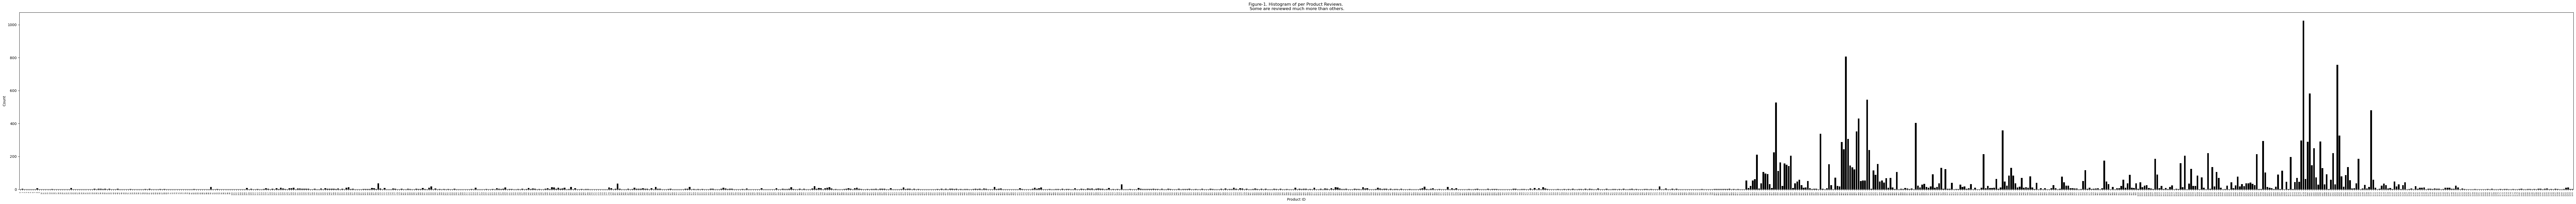

In [12]:
plt.clf
plt.figure(figsize=(100,8))
reviews_summ = reviews.groupby('Product ID').size().reset_index(name='Count')
sns.barplot(x='Product ID', y='Count', data=reviews_summ, color='black')
plt.xticks(rotation=90, fontsize=5)
fig=1
plt.title(f"Figure-{fig}. Histogram of per Product Reviews. \n Some are reviewed much more than others.")
plt.tight_layout()
plt.show()

In [13]:
def plt_categ(col_name, subplot=np.NaN, df = reviews):
    reviews_summ = reviews.groupby(col_name).size().reset_index(name='Count')
    sns.barplot(x=col_name, y='Count', data=reviews_summ, color='black', ax=subplot)
    plt.xticks(rotation=90, fontsize=8)
    plt.title(f"Histogram of per {col_name}.")

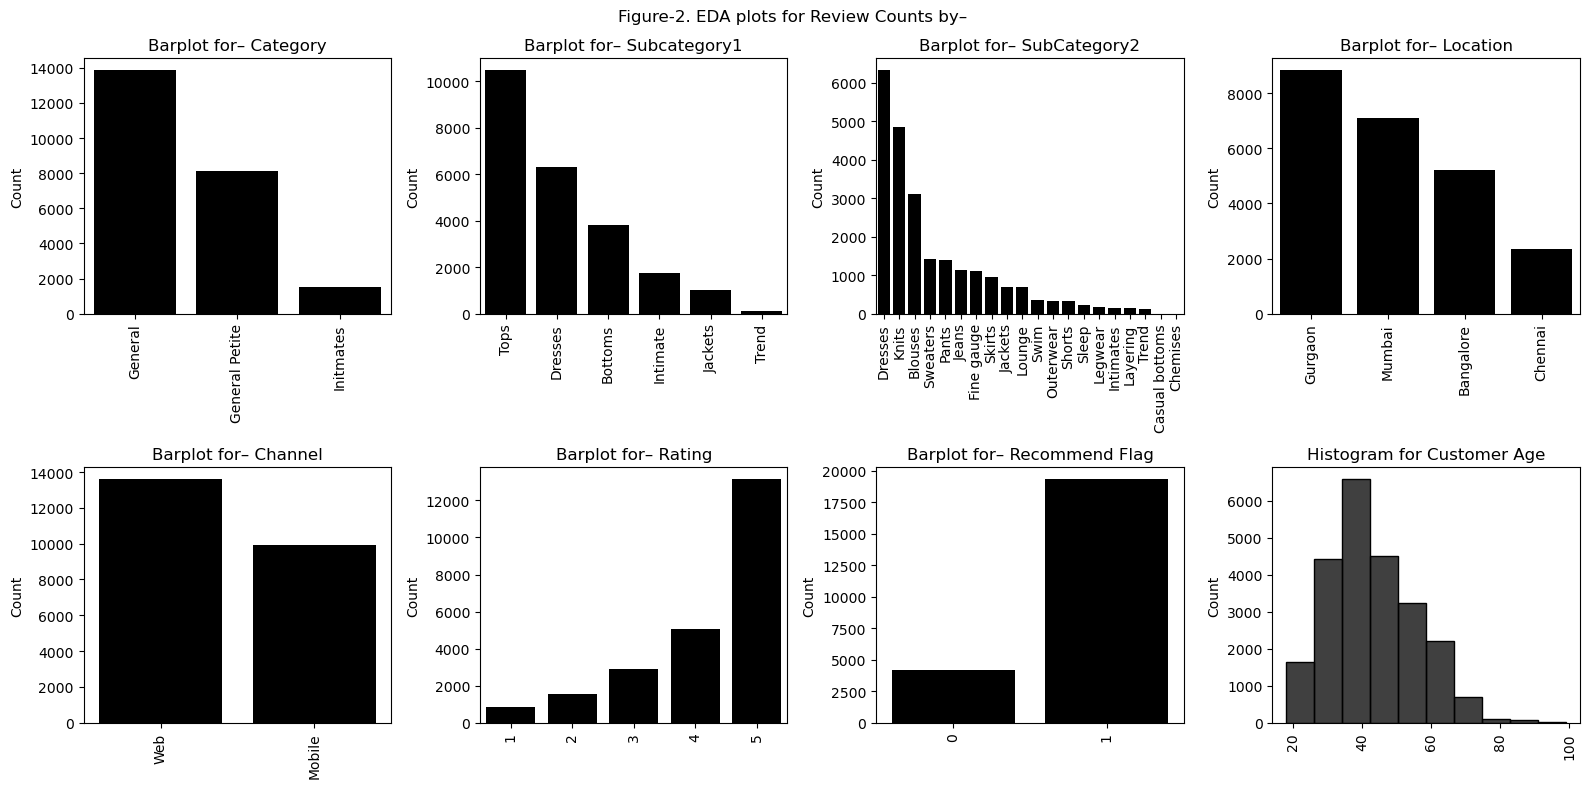

In [14]:
fig, ax = plt.subplots(2, 4, figsize=(16, 8)) 
ax = ax.flatten()
Categ_for_EDA = ['Category', 'Subcategory1', 'SubCategory2', 'Location','Channel', 'Rating','Recommend Flag']
num_EDA = ['Customer Age']
all_features = Categ_for_EDA+num_EDA
for i in range(len(all_features)):
    feature = all_features[i]
    
    if feature in num_EDA:
        sns.histplot(reviews[feature], bins=10, kde=False, color='black', ax=ax[i])
        ax[i].set_title(f"Histogram for {feature}")
    else:
        reviews_summ = reviews.groupby(feature).size().reset_index(name='Count')
        reviews_summ = reviews_summ.sort_values(by='Count', ascending=False)
        sns.barplot(x=feature, y='Count', data=reviews_summ, color='black', ax=ax[i])
        ax[i].set_title(f"Barplot for– {feature}")
        
    ax[i].tick_params(axis='x', rotation=90, labelsize=10)
    ax[i].set_xlabel('')
plt.suptitle("Figure-2. EDA plots for Review Counts by– ")
plt.tight_layout()


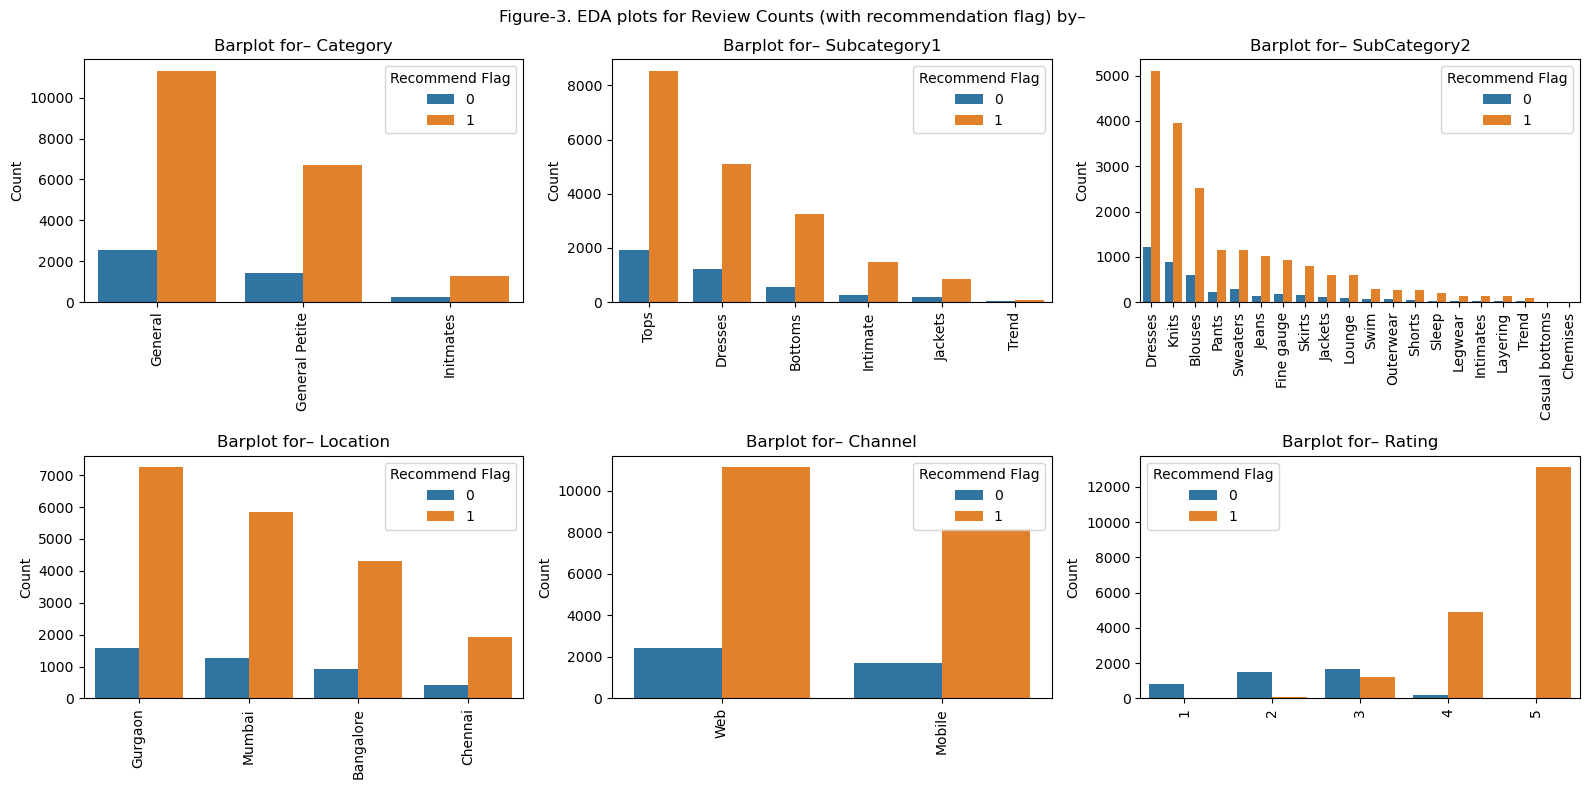

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8)) 
ax = ax.flatten()
Categ_for_EDA = ['Category', 'Subcategory1', 'SubCategory2', 'Location','Channel', 'Rating']
# num_EDA = ['Customer Age']
all_features = Categ_for_EDA+num_EDA
for i in range(len(Categ_for_EDA)):
    feature = all_features[i]
    reviews_summ = reviews.groupby([feature,'Recommend Flag']).size().reset_index(name='Count')
    reviews_summ = reviews_summ.sort_values(by='Count', ascending=False)
    sns.barplot(x=feature, y='Count', hue='Recommend Flag', data=reviews_summ, ax=ax[i])
    ax[i].set_title(f"Barplot for– {feature}")
        
    ax[i].tick_params(axis='x', rotation=90, labelsize=10)
    ax[i].set_xlabel('')
plt.suptitle("Figure-3. EDA plots for Review Counts (with recommendation flag) by– ")
plt.tight_layout()

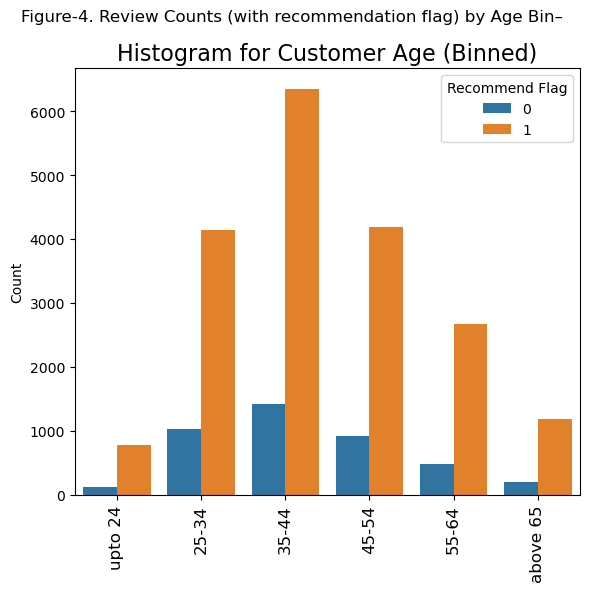

In [16]:
bin_edges = np.arange(start=np.floor(reviews['Customer Age'].min()), stop=np.ceil(reviews['Customer Age'].max()) + 1, step=5)
reviews['age_bins'] = np.where(reviews['Customer Age'] < 25, "upto 24",
                              np.where(reviews['Customer Age'] < 35, "25-34",
                                       np.where(reviews['Customer Age'] < 45, "35-44",
                                                np.where(reviews['Customer Age'] < 55, "45-54",
                                                         np.where(reviews['Customer Age'] < 65, "55-64",
                                                                  np.where(reviews['Customer Age'] >= 65, "above 65", np.NaN))))))

age_labels = ["upto 24", "25-34", "35-44", "45-54", "55-64", "above 65"]
reviews['age_bins'] = pd.Categorical(reviews['age_bins'], categories=age_labels, ordered=True)

age_bins = reviews.groupby(['age_bins','Recommend Flag'], observed=False).size().reset_index(name='Count')
plt.figure(figsize=(6, 6))  # Adjust figure size to make bars wider
sns.barplot(x='age_bins', y='Count', data=age_bins, hue='Recommend Flag', width=0.8)
plt.xticks(rotation=90, fontsize=12)
plt.title('Histogram for Customer Age (Binned)', fontsize=16)
plt.xlabel('Customer Age Bins', fontsize=14)
plt.ylabel('Count', fontsize=10)
plt.xlabel('')
plt.suptitle("Figure-4. Review Counts (with recommendation flag) by Age Bin– ")
plt.tight_layout()
plt.show()

## Text Mining:
- Perform text mining tasks to understand what words are most frequently used for positive sentiment and negative sentiment.
- Create word clouds for the positive and negative reviews separately.

__Approach:__ 
- Data Processing
- Filter Reviews
- Pairwise Ranking
- Classification

In [17]:
## We may remember-
## Category has n=14 or 0.05961 % null values.
## Subcategory1 has n=14 or 0.05961 % null values.
## SubCategory2 has n=14 or 0.05961 % null values.
## Review Title has n=3810 or 16.2224 % null values.
## Review Text has n=845 or 3.59789 % null values.

reviews_informative = reviews.copy(deep=True)
print(f"Initially we have shape of reviews = {reviews.shape}")
reviews_informative = reviews_informative[reviews_informative['Category'].notnull()]
print(f"After removing 'Category' we have shape of reviews = {reviews_informative.shape}")
reviews_informative = reviews[reviews['Subcategory1'].notnull()]
print(f"After removing 'Subcategory1' we have shape of reviews = {reviews_informative.shape}")
reviews_informative = reviews[reviews['SubCategory2'].notnull()]
print(f"After removing 'SubCategory2' we have shape of reviews = {reviews_informative.shape}")

## I am not removing text and title nulls
reviews_informative.columns

Initially we have shape of reviews = (23486, 12)
After removing 'Category' we have shape of reviews = (23472, 12)
After removing 'Subcategory1' we have shape of reviews = (23472, 12)
After removing 'SubCategory2' we have shape of reviews = (23472, 12)


Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag', 'age_bins'],
      dtype='object')

In [18]:
reviews_informative = reviews_informative.copy(deep=True)
reviews_informative['title_text'] = reviews_informative['Review Title'].fillna(' ')+reviews_informative['Review Text'].fillna(' ')
reviews_informative['review_len'] = reviews_informative['title_text'].apply(lambda x: len(x.split()))
reviews_informative.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,age_bins,title_text,review_len
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,absolutely wonderful - silky and sexy and comf...,4,1,25-34,absolutely wonderful - silky and sexy and com...,8
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,love this dress! it's sooo pretty. i happene...,5,1,25-34,love this dress! it's sooo pretty. i happen...,62
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,some major design flaws,i had such high hopes for this dress and reall...,3,0,55-64,some major design flawsi had such high hopes f...,101
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,1,45-54,"my favorite buy!i love, love, love this jumpsu...",24
4,847,General,Tops,Blouses,Bangalore,Web,47,flattering shirt,this shirt is very flattering to all due to th...,5,1,45-54,flattering shirtthis shirt is very flattering ...,37


Text(0.5, 0.98, 'Figure-5. Review length histogram')

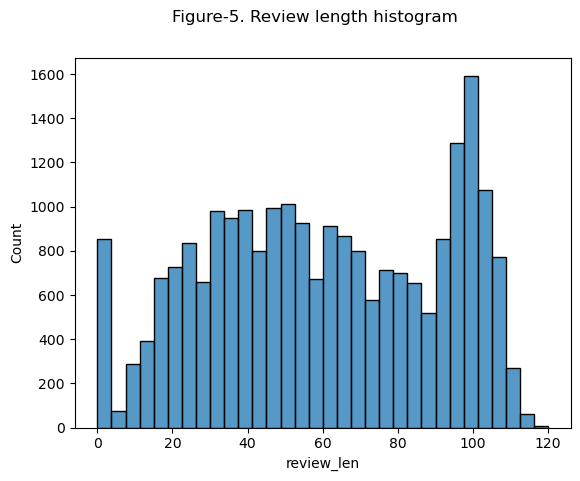

In [19]:
sns.histplot(reviews_informative['review_len'])
plt.suptitle("Figure-5. Review length histogram")

In [20]:
checklen = []
for i in range(5,50, 5):
    checklen.append(len(reviews_informative[ (reviews_informative['review_len']>=i-5) & (reviews_informative['review_len']<i)]))
checklen

[863, 144, 599, 837, 961, 1099, 1199, 1239, 1272]

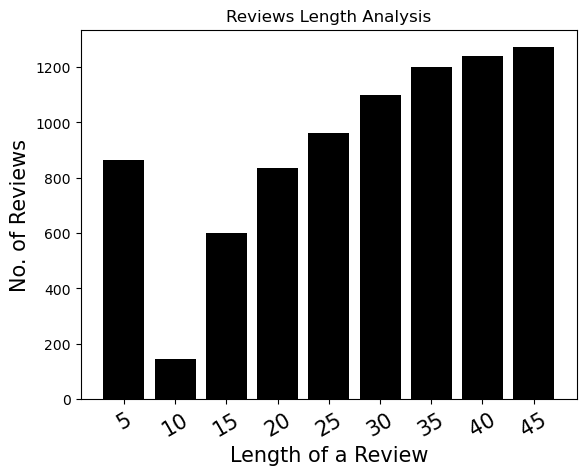

In [21]:
index = np.arange(len(checklen))
plt.bar(index, checklen, color='black')
plt.xlabel('Length of a Review', fontsize=15)
plt.ylabel('No. of Reviews', fontsize=15)
plt.xticks(index, range(5,50,5), fontsize=15, rotation=30)
plt.title('Reviews Length Analysis')
plt.show()

### 1. Bad Reviews
- detect language
- detect gibberish
- filter profanity (did not do)
- correct spellings
- label brands (did not do)
- Correct spelling
- fix slang and emojis
- remove stop_words
- 

In [22]:
import re
reviews_informative['title_text'][1]

' love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [23]:
from langdetect import detect, DetectorFactory

# Ensure consistent results
DetectorFactory.seed = 0

# Function to detect language
def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except Exception as e:
        return f"Error: {e}"

def is_gibberish(text, min_word_length=2, min_word_count=5):
    words = re.findall(r'\b\w+\b', text)
    long_words = [word for word in words if len(word) >= min_word_length]
    return len(long_words) < min_word_count

## not using it but good to have
def contains_profanity(text, profanity_list):
    text = text.lower()
    words = re.findall(r'\b\w+\b', text)
    return any(word in profanity_list for word in words)

reviews_informative['language'] = reviews_informative['title_text'].apply(detect_language)
reviews_informative['is_gibberish'] = reviews_informative['title_text'].apply(is_gibberish)

In [24]:
## pip install TextBlob

In [25]:
from textblob import TextBlob

In [26]:
## not sure if this is required, it takes a lot of time will try again,
## def correct_spelling(text):
##    return str(TextBlob(text).correct())

## reviews_informative['corrected_text'] = reviews_informative['title_text'].apply(correct_spelling)

In [27]:
reviews_informative.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,age_bins,title_text,review_len,language,is_gibberish
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,absolutely wonderful - silky and sexy and comf...,4,1,25-34,absolutely wonderful - silky and sexy and com...,8,en,False
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,love this dress! it's sooo pretty. i happene...,5,1,25-34,love this dress! it's sooo pretty. i happen...,62,en,False
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,some major design flaws,i had such high hopes for this dress and reall...,3,0,55-64,some major design flawsi had such high hopes f...,101,en,False
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,1,45-54,"my favorite buy!i love, love, love this jumpsu...",24,en,False
4,847,General,Tops,Blouses,Bangalore,Web,47,flattering shirt,this shirt is very flattering to all due to th...,5,1,45-54,flattering shirtthis shirt is very flattering ...,37,en,False


In [28]:
## slang_emoji_polarity_compoundscore
def preprocess_text(text):
    text = re.sub(r'😃', 'happy', text)
    text = re.sub(r'😍', 'love', text)
    text = re.sub(r'😡', 'angry', text)
    text = re.sub(r'🤷‍♂️', 'not sure', text)
    text = re.sub(r'🤔', 'thinking', text)
    text = re.sub(r'💯', 'perfect', text)

    text = re.sub(r'OMG', 'Oh my God', text)
    
    return text

reviews_informative['preprocessed_emojis_slang'] = reviews_informative['title_text'].apply(preprocess_text)

In [29]:
## tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK corpora
## import nltk
## nltk.download('wordnet')
## nltk.download('omw-1.4')
## nltk.download('stopwords')
## nltk.download('punkt')
## nltk.download('punkt_tab')

def tokenize_reviews(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = text.lower()  # Convert to lower case
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return tokens

reviews_informative['tokens'] = reviews_informative['preprocessed_emojis_slang'].apply(tokenize_reviews)

In [30]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
## nltk.download('averaged_perceptron_tagger_eng')
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Lemmatize tokens
def lemmatize_tokens(tokens):
    pos_tags = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]



reviews_informative['lemmatized'] = reviews_informative['tokens'].apply(lemmatize_tokens)

In [31]:
## should be merged with previous
## Will do it later
from collections import Counter

def extract_nouns(text):
    words = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    nouns = [word for word, pos in pos_tags if pos.startswith('NN')]
    return nouns

# Function to calculate noun strength
def calculate_noun_strength(text):
    words = nltk.word_tokenize(text)
    total_words = len(words)
    
    nouns = extract_nouns(text)
    num_nouns = len(nouns)
    
    if total_words == 0:
        return 0
    
    noun_strength = num_nouns / total_words
    return noun_strength

reviews_informative['noun_strength'] = reviews_informative['preprocessed_emojis_slang'].apply(calculate_noun_strength)

In [32]:
def join_tokens(tokens):
    return " ".join(tokens)
    
reviews_informative['lemmatized_text'] = reviews_informative['lemmatized'].apply(join_tokens)

In [33]:
reviews_informative.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,...,age_bins,title_text,review_len,language,is_gibberish,preprocessed_emojis_slang,tokens,lemmatized,noun_strength,lemmatized_text
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,absolutely wonderful - silky and sexy and comf...,4,...,25-34,absolutely wonderful - silky and sexy and com...,8,en,False,absolutely wonderful - silky and sexy and com...,"[absolutely, wonderful, silky, sexy, comfortable]","[absolutely, wonderful, silky, sexy, comfortable]",0.250000,absolutely wonderful silky sexy comfortable
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,love this dress! it's sooo pretty. i happene...,5,...,25-34,love this dress! it's sooo pretty. i happen...,62,en,False,love this dress! it's sooo pretty. i happen...,"[love, dress, sooo, pretty, happened, find, st...","[love, dress, sooo, pretty, happen, find, stor...",0.160000,love dress sooo pretty happen find store glad ...
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,some major design flaws,i had such high hopes for this dress and reall...,3,...,55-64,some major design flawsi had such high hopes f...,101,en,False,some major design flawsi had such high hopes f...,"[major, design, flawsi, high, hopes, dress, re...","[major, design, flawsi, high, hope, dress, rea...",0.159292,major design flawsi high hope dress really wan...
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,...,45-54,"my favorite buy!i love, love, love this jumpsu...",24,en,False,"my favorite buy!i love, love, love this jumpsu...","[favorite, buy, love, love, love, jumpsuit, fu...","[favorite, buy, love, love, love, jumpsuit, fu...",0.257143,favorite buy love love love jumpsuit fun flirt...
4,847,General,Tops,Blouses,Bangalore,Web,47,flattering shirt,this shirt is very flattering to all due to th...,5,...,45-54,flattering shirtthis shirt is very flattering ...,37,en,False,flattering shirtthis shirt is very flattering ...,"[flattering, shirtthis, shirt, flattering, due...","[flatter, shirtthis, shirt, flatter, due, adju...",0.190476,flatter shirtthis shirt flatter due adjustable...


In [34]:
## sentiment polarity
## this is textBlob, alternates are VADER or SpaCy

def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
reviews_informative['polarity'] = reviews_informative['lemmatized_text'].apply(get_sentiment_polarity)
## reviews_informative.head()

In [35]:
reviews_informative['sentiment'] = np.where(reviews_informative['polarity'] > 0, "Positive",
                                            np.where(reviews_informative['polarity'] < 0, "Negative", "Neutral"))
reviews_informative.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,...,review_len,language,is_gibberish,preprocessed_emojis_slang,tokens,lemmatized,noun_strength,lemmatized_text,polarity,sentiment
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,absolutely wonderful - silky and sexy and comf...,4,...,8,en,False,absolutely wonderful - silky and sexy and com...,"[absolutely, wonderful, silky, sexy, comfortable]","[absolutely, wonderful, silky, sexy, comfortable]",0.250000,absolutely wonderful silky sexy comfortable,0.633333,Positive
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,love this dress! it's sooo pretty. i happene...,5,...,62,en,False,love this dress! it's sooo pretty. i happen...,"[love, dress, sooo, pretty, happened, find, st...","[love, dress, sooo, pretty, happen, find, stor...",0.160000,love dress sooo pretty happen find store glad ...,0.318750,Positive
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,some major design flaws,i had such high hopes for this dress and reall...,3,...,101,en,False,some major design flawsi had such high hopes f...,"[major, design, flawsi, high, hopes, dress, re...","[major, design, flawsi, high, hope, dress, rea...",0.159292,major design flawsi high hope dress really wan...,0.081439,Positive
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,...,24,en,False,"my favorite buy!i love, love, love this jumpsu...","[favorite, buy, love, love, love, jumpsuit, fu...","[favorite, buy, love, love, love, jumpsuit, fu...",0.257143,favorite buy love love love jumpsuit fun flirt...,0.500000,Positive
4,847,General,Tops,Blouses,Bangalore,Web,47,flattering shirt,this shirt is very flattering to all due to th...,5,...,37,en,False,flattering shirtthis shirt is very flattering ...,"[flattering, shirtthis, shirt, flattering, due...","[flatter, shirtthis, shirt, flatter, due, adju...",0.190476,flatter shirtthis shirt flatter due adjustable...,0.458333,Positive


In [36]:
# Function to get sentiment subjectivity
def get_sentiment_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

reviews_informative['subjectivity_score'] = reviews_informative['lemmatized_text'].apply(get_sentiment_subjectivity)

In [37]:
reviews_informative['subjectivity'] = np.where(reviews_informative['subjectivity_score'] > 0.5, "Subjective",
                                            np.where(reviews_informative['subjectivity_score'] < 0, "Objective", "Neutral"))
reviews_informative.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,...,is_gibberish,preprocessed_emojis_slang,tokens,lemmatized,noun_strength,lemmatized_text,polarity,sentiment,subjectivity_score,subjectivity
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,absolutely wonderful - silky and sexy and comf...,4,...,False,absolutely wonderful - silky and sexy and com...,"[absolutely, wonderful, silky, sexy, comfortable]","[absolutely, wonderful, silky, sexy, comfortable]",0.250000,absolutely wonderful silky sexy comfortable,0.633333,Positive,0.933333,Subjective
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,love this dress! it's sooo pretty. i happene...,5,...,False,love this dress! it's sooo pretty. i happen...,"[love, dress, sooo, pretty, happened, find, st...","[love, dress, sooo, pretty, happen, find, stor...",0.160000,love dress sooo pretty happen find store glad ...,0.318750,Positive,0.725000,Subjective
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,some major design flaws,i had such high hopes for this dress and reall...,3,...,False,some major design flawsi had such high hopes f...,"[major, design, flawsi, high, hopes, dress, re...","[major, design, flawsi, high, hope, dress, rea...",0.159292,major design flawsi high hope dress really wan...,0.081439,Positive,0.352567,Neutral
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,...,False,"my favorite buy!i love, love, love this jumpsu...","[favorite, buy, love, love, love, jumpsuit, fu...","[favorite, buy, love, love, love, jumpsuit, fu...",0.257143,favorite buy love love love jumpsuit fun flirt...,0.500000,Positive,0.678571,Subjective
4,847,General,Tops,Blouses,Bangalore,Web,47,flattering shirt,this shirt is very flattering to all due to th...,5,...,False,flattering shirtthis shirt is very flattering ...,"[flattering, shirtthis, shirt, flattering, due...","[flatter, shirtthis, shirt, flatter, due, adju...",0.190476,flatter shirtthis shirt flatter due adjustable...,0.458333,Positive,0.658333,Subjective


In [38]:
## service tag

# Define service-related keywords
service_keywords = {
    'Customer Service': ['help', 'account', 'refund', 'service'],
    'Tech Support': ['tech support', 'technical', 'support']
}

# Function to tag text with service-related tags
def tag_service(text, keywords):
    tags = []
    text_lower = text.lower()
    for tag, words in keywords.items():
        if any(word in text_lower for word in words):
            tags.append(tag)
    return ', '.join(tags) if tags else 'No Tag'

# Apply tagging function
reviews_informative['service_tag'] = reviews_informative['lemmatized_text'].apply(lambda x: tag_service(x, service_keywords))
reviews_informative

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,...,preprocessed_emojis_slang,tokens,lemmatized,noun_strength,lemmatized_text,polarity,sentiment,subjectivity_score,subjectivity,service_tag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,absolutely wonderful - silky and sexy and comf...,4,...,absolutely wonderful - silky and sexy and com...,"[absolutely, wonderful, silky, sexy, comfortable]","[absolutely, wonderful, silky, sexy, comfortable]",0.250000,absolutely wonderful silky sexy comfortable,0.633333,Positive,0.933333,Subjective,No Tag
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,love this dress! it's sooo pretty. i happene...,5,...,love this dress! it's sooo pretty. i happen...,"[love, dress, sooo, pretty, happened, find, st...","[love, dress, sooo, pretty, happen, find, stor...",0.160000,love dress sooo pretty happen find store glad ...,0.318750,Positive,0.725000,Subjective,No Tag
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,some major design flaws,i had such high hopes for this dress and reall...,3,...,some major design flawsi had such high hopes f...,"[major, design, flawsi, high, hopes, dress, re...","[major, design, flawsi, high, hope, dress, rea...",0.159292,major design flawsi high hope dress really wan...,0.081439,Positive,0.352567,Neutral,No Tag
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,...,"my favorite buy!i love, love, love this jumpsu...","[favorite, buy, love, love, love, jumpsuit, fu...","[favorite, buy, love, love, love, jumpsuit, fu...",0.257143,favorite buy love love love jumpsuit fun flirt...,0.500000,Positive,0.678571,Subjective,No Tag
4,847,General,Tops,Blouses,Bangalore,Web,47,flattering shirt,this shirt is very flattering to all due to th...,5,...,flattering shirtthis shirt is very flattering ...,"[flattering, shirtthis, shirt, flattering, due...","[flatter, shirtthis, shirt, flatter, due, adju...",0.190476,flatter shirtthis shirt flatter due adjustable...,0.458333,Positive,0.658333,Subjective,No Tag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,great dress for many occasions,i was very happy to snag this dress at such a ...,5,...,great dress for many occasionsi was very happy...,"[great, dress, many, occasionsi, happy, snag, ...","[great, dress, many, occasionsi, happy, snag, ...",0.200000,great dress many occasionsi happy snag dress g...,0.666667,Positive,0.766667,Subjective,No Tag
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,wish it was made of cotton,"it reminds me of maternity clothes. soft, stre...",3,...,wish it was made of cottonit reminds me of mat...,"[wish, made, cottonit, reminds, maternity, clo...","[wish, make, cottonit, remind, maternity, clot...",0.207547,wish make cottonit remind maternity clothes so...,0.191667,Positive,0.708333,Subjective,No Tag
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"cute, but see through","this fit well, but the top was very see throug...",3,...,"cute, but see throughthis fit well, but the to...","[cute, see, throughthis, fit, well, top, see, ...","[cute, see, throughthis, fit, well, top, see, ...",0.148148,cute see throughthis fit well top see never wo...,0.457143,Positive,0.696429,Subjective,No Tag
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"very cute dress, perfect for summer parties an...",i bought this dress for a wedding i have this ...,3,...,"very cute dress, perfect for summer parties an...","[cute, dress, perfect, summer, parties, wei, b...","[cute, dress, perfect, summer, party, wei, buy...",0.179245,cute dress perfect summer party wei buy dress ...,0.495455,Positive,0.645455,Subjective,No Tag


In [39]:
## pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def get_compound_score(text):
    # Get the sentiment scores
    sentiment_scores = analyzer.polarity_scores(text)
    # Return the compound score
    return sentiment_scores['compound']
reviews_informative['compound_VADER_score'] = reviews_informative['lemmatized_text'].apply(get_compound_score)
reviews_informative.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,...,tokens,lemmatized,noun_strength,lemmatized_text,polarity,sentiment,subjectivity_score,subjectivity,service_tag,compound_VADER_score
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,absolutely wonderful - silky and sexy and comf...,4,...,"[absolutely, wonderful, silky, sexy, comfortable]","[absolutely, wonderful, silky, sexy, comfortable]",0.250000,absolutely wonderful silky sexy comfortable,0.633333,Positive,0.933333,Subjective,No Tag,0.8991
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,love this dress! it's sooo pretty. i happene...,5,...,"[love, dress, sooo, pretty, happened, find, st...","[love, dress, sooo, pretty, happen, find, stor...",0.160000,love dress sooo pretty happen find store glad ...,0.318750,Positive,0.725000,Subjective,No Tag,0.9710
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,some major design flaws,i had such high hopes for this dress and reall...,3,...,"[major, design, flawsi, high, hopes, dress, re...","[major, design, flawsi, high, hope, dress, rea...",0.159292,major design flawsi high hope dress really wan...,0.081439,Positive,0.352567,Neutral,No Tag,0.9081
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,...,"[favorite, buy, love, love, love, jumpsuit, fu...","[favorite, buy, love, love, love, jumpsuit, fu...",0.257143,favorite buy love love love jumpsuit fun flirt...,0.500000,Positive,0.678571,Subjective,No Tag,0.9587
4,847,General,Tops,Blouses,Bangalore,Web,47,flattering shirt,this shirt is very flattering to all due to th...,5,...,"[flattering, shirtthis, shirt, flattering, due...","[flatter, shirtthis, shirt, flatter, due, adju...",0.190476,flatter shirtthis shirt flatter due adjustable...,0.458333,Positive,0.658333,Subjective,No Tag,0.8957


In [40]:
# Classify the sentiment based on the compound score
reviews_informative['VADER_sentiment'] = np.where(reviews_informative['compound_VADER_score'] >= 0.5, "Positive Sentiment",
                                        np.where(reviews_informative['compound_VADER_score'] <= -0.5, "Negative Sentiment",
                                        "Neutral Sentiment"))

reviews_informative.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,...,lemmatized,noun_strength,lemmatized_text,polarity,sentiment,subjectivity_score,subjectivity,service_tag,compound_VADER_score,VADER_sentiment
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,absolutely wonderful - silky and sexy and comf...,4,...,"[absolutely, wonderful, silky, sexy, comfortable]",0.250000,absolutely wonderful silky sexy comfortable,0.633333,Positive,0.933333,Subjective,No Tag,0.8991,Positive Sentiment
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,love this dress! it's sooo pretty. i happene...,5,...,"[love, dress, sooo, pretty, happen, find, stor...",0.160000,love dress sooo pretty happen find store glad ...,0.318750,Positive,0.725000,Subjective,No Tag,0.9710,Positive Sentiment
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,some major design flaws,i had such high hopes for this dress and reall...,3,...,"[major, design, flawsi, high, hope, dress, rea...",0.159292,major design flawsi high hope dress really wan...,0.081439,Positive,0.352567,Neutral,No Tag,0.9081,Positive Sentiment
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,...,"[favorite, buy, love, love, love, jumpsuit, fu...",0.257143,favorite buy love love love jumpsuit fun flirt...,0.500000,Positive,0.678571,Subjective,No Tag,0.9587,Positive Sentiment
4,847,General,Tops,Blouses,Bangalore,Web,47,flattering shirt,this shirt is very flattering to all due to th...,5,...,"[flatter, shirtthis, shirt, flatter, due, adju...",0.190476,flatter shirtthis shirt flatter due adjustable...,0.458333,Positive,0.658333,Subjective,No Tag,0.8957,Positive Sentiment


In [41]:
## Review Complexity

# Create a set of all unique words in all reviews
all_words_set = set()
reviews_informative['lemmatized'].apply(lambda x: all_words_set.update(x))

# Calculate the total number of words across all reviews
total_word_count = reviews_informative['lemmatized_text'].apply(len).sum()

# Calculate the unique word fraction for each review
reviews_informative['unique_word_fraction'] = reviews_informative['lemmatized_text'].apply(lambda x: len(set(x)) / total_word_count)

# Display the resulting DataFrame with the new 'unique_word_fraction' column
reviews_informative[['lemmatized_text', 'unique_word_fraction']].sort_values(by='unique_word_fraction', ascending=False)



,lemmatized_text,unique_word_fraction
1666,floreat perfect yet wrong try lovely high wast...,0.000008
13044,vintage appeal soft chunky knitthis 1960s aprã...,0.000008
5837,5 6 130 waist 28 39 hip 36 37 tried size 27 us...,0.000008
19019,great bikini top cna find right fiti order top...,0.000008
17746,twirly full skirt _x000d_ 5 6 130lbs 34 35a 28...,0.000008
...,...,...
19996,,0.000000
19992,,0.000000
19989,,0.000000
10286,,0.000000


In [42]:
## Save Features
reviews_features = reviews_informative[['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Rating', 'Recommend Flag', 'age_bins', 'review_len', 'is_gibberish', 
       'noun_strength', 'polarity','subjectivity_score', 'compound_VADER_score', 'unique_word_fraction', 'lemmatized']]
reviews_features.to_csv("reviews_features.csv")
reviews_features.head()


,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Rating,Recommend Flag,age_bins,review_len,is_gibberish,noun_strength,polarity,subjectivity_score,compound_VADER_score,unique_word_fraction,lemmatized
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,4,1,25-34,8,False,0.250000,0.633333,0.933333,0.8991,0.000005,"[absolutely, wonderful, silky, sexy, comfortable]"
1,1080,General,Dresses,Dresses,Bangalore,Mobile,5,1,25-34,62,False,0.160000,0.318750,0.725000,0.9710,0.000006,"[love, dress, sooo, pretty, happen, find, stor..."
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,3,0,55-64,101,False,0.159292,0.081439,0.352567,0.9081,0.000006,"[major, design, flawsi, high, hope, dress, rea..."
3,1049,General Petite,Bottoms,Pants,Chennai,Web,5,1,45-54,24,False,0.257143,0.500000,0.678571,0.9587,0.000005,"[favorite, buy, love, love, love, jumpsuit, fu..."
4,847,General,Tops,Blouses,Bangalore,Web,5,1,45-54,37,False,0.190476,0.458333,0.658333,0.8957,0.000005,"[flatter, shirtthis, shirt, flatter, due, adju..."


# Feature Engineering
### From these review text we wanted to extract relevance out of these, understanding in depth sense of reviews. 

#### Features extraction covers every necessary property/viewpoints and to measure features in a quantitative manner is a much-needed task in order to achieve highly accurate outcomes. Hence, this section discusses all the features extracted from reviews.

1. Noun Strength (Rn): Nouns are subjects and considered as the most informative part of a language. The amount of subjects shows the importance of review because only a noun describes the prime factors of review (which tells us what the review is about). We did POS Tagging to find nouns in a review and computed score as:
<br>Score(Rn) = TFIDF(noun) / TFIDF(all words)
<br><be>
__DONE__
2. Review Polarity (Rp): Its value lies between -1 to +1 which tells whether a review has sentiment or negative sentiment.
<br><br>
__DONE__
3. Review Subjectivity (Rs): The subjectivity is a measure of the sentiment being objective to subjective and goes from 0 to 1. Objective expressions are facts while Subjective expressions are opinions that describe a person’s feelings. Consider the following expression:
<br>Bournvita tastes very good with milk: Subjective <br>
Bournvita is brown in color: Objective
<br><be>
__DONE__
4. Review Complexity (Rc): To evaluate how good and complex a review is, in terms of unique words within a review and across entire review corpus of a particular product.
Rc = Number of unique words in a Review / Number of unique words in entire Corpus
<br><br>
__To Do__
5. Review Word Length (Rw): Word count of a Review
<br><be>
__DONE__
6. Service Tagger (Rd): The best review is one that talks more about how is the product, how it tastes, what are its uses, and the one which talks about the effectiveness of a product. Reviews are basically to describe a product. So, a dictionary of words is created which would mark reviews as service-based, delivery reviews, and customer support.
<br>Fuzzy matching of every word in a review is done with the words in the dictionary with Levenshtein distance. Levenshtein distance helps in measuring the difference between two sequences and tackle spell errors in review, for example, instead of “My delivery was on time”, Reviews is wrongly written as “My dilivery was on time”. In this case, Fuzzy matching would help us to match both the reviews.
<br><br>
__Need to identify services__
7. Compound Score (Rsc): To improve the efficiency of the system. We compute the compound score using VaderSentimentAnalyser. This library is taken from VADER (Valence Aware Dictionary and sEntiment Reasoner). This is a lexicon and rule-based sentiment analysis tool that is specifically tuned to determine sentiments expressed in social media content. It has the ability to find the sentiment of Slang (e.g. SUX!), Emoji (😩, 😂), Emoticons ( :), :D ) and the difference between capitalized word expressions(I am SAD, I am sad are different expressions).
<br>Rsc ≥ 0.5 (Positive Sentiment)
<br>-0.5<Rsc<+0.5 (Neural Sentiment)
<br>Rsc≤ -0.5 (Negative Sentiment)
<br><be>
__NEED TO DO__

__Miscellaneous:__ We purposely did not include Reviews Rating as a feature. Inclusion of Ratings totally blunders the entire system because of two reasons:
<br>1. Common confusion between Rating and Reviews. For example, someone who rates the product ‘1’ (On a rating scale of 1–5, ‘1’ being the ‘lowest’ and ‘5’ being the ‘highest’) writes the review comment as ‘very good and useful medicine’.
<br>2. A large portion of Reviews from customers are either 5 stars or 1 star.

TextBlob: https://textblob.readthedocs.io/en/dev/index.html <br>
VaderSentiment: https://github.com/cjhutto/vaderSentiment <br>
spaCy: https://spacy.io/ <be>

### also see
https://www.kaggle.com/code/pythonafroz/nlp-transformer-based-models

In [43]:
reviews_characteristics = reviews_informative.copy(deep=True)
reviews_characteristics['language'].value_counts(dropna=False)
reviews_characteristics = reviews_characteristics[reviews_characteristics['language'] == 'en']
reviews_characteristics.drop(columns = ['language'])
reviews_characteristics.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag', 'age_bins', 'title_text', 'review_len', 'language',
       'is_gibberish', 'preprocessed_emojis_slang', 'tokens', 'lemmatized',
       'noun_strength', 'lemmatized_text', 'polarity', 'sentiment',
       'subjectivity_score', 'subjectivity', 'service_tag',
       'compound_VADER_score', 'VADER_sentiment', 'unique_word_fraction'],
      dtype='object')

In [44]:
from wordcloud import WordCloud
from matplotlib.backends.backend_pdf import PdfPages

def generate_wordclouds_to_pdf(df, category_column, text_column, pdf_pages, ncols=3):
    col_values = df[category_column].unique()
    nrows = (len(col_values) + ncols - 1) // ncols  # Calculate the number of rows needed
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 5))
    axes = axes.flatten()  # Flatten the 2D array of axes to iterate easily
    
    for i, value in enumerate(col_values):
        category_text = ' '.join(df[df[category_column] == value][text_column])
        
        if not category_text.strip():  # Skip if the text is empty
            axes[i].axis('off')  # Hide the subplot
            continue
        
        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)

        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(f'Word Cloud for {category_column} - {value}')
        axes[i].axis('off')  # Hide axes
    
    # Hide any unused subplots
    for j in range(len(col_values), len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    pdf_pages.savefig(fig)  # Save the current figure to the PDF
    plt.close(fig)  # Close the figure to free memory

columns_categs = ['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel', 'Rating','Recommend Flag', 'age_bins','is_gibberish', 'subjectivity', 'sentiment', 'VADER_sentiment']
## 'preprocessed_emojis_slang', , 'service_tag', 'VADER_sentiment' ]
# Example usage:
with PdfPages("wordclouds_by_categories.pdf") as pdf_pages:
    for col in columns_categs:
        generate_wordclouds_to_pdf(reviews_characteristics, col, 'lemmatized_text', pdf_pages, ncols=3)


In [45]:
from wordcloud import WordCloud
from matplotlib.backends.backend_pdf import PdfPages
from collections import Counter
from nltk import bigrams
import itertools

def generate_bigram_wordclouds_to_pdf(df, category_column, text_column, pdf_pages, ncols=3):
    col_values = df[category_column].unique()
    nrows = (len(col_values) + ncols - 1) // ncols  # Calculate the number of rows needed
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 5))
    axes = axes.flatten()  # Flatten the 2D array of axes to iterate easily
    
    for i, value in enumerate(col_values):
        # Extract the text for the specific category
        category_text = df[df[category_column] == value][text_column]
        
        # Generate bigrams from the text
        bigram_list = list(itertools.chain(*[list(bigrams(text.split())) for text in category_text]))
        bigram_counts = Counter(bigram_list)
        
        if not bigram_counts:  # Skip if there are no bigrams
            axes[i].axis('off')  # Hide the subplot
            continue
        
        # Create a dictionary for the word cloud
        bigram_dict = {' '.join(k): v for k, v in bigram_counts.items()}
        
        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_dict)

        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(f'Bigram Word Cloud for {category_column} - {value}')
        axes[i].axis('off')  # Hide axes
    
    # Hide any unused subplots
    for j in range(len(col_values), len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    pdf_pages.savefig(fig)  # Save the current figure to the PDF
    plt.close(fig)  # Close the figure to free memory

# Example usage:
with PdfPages("bigram_wordclouds_by_category.pdf") as pdf_pages:
    for col in Categ_for_EDA:
        generate_bigram_wordclouds_to_pdf(reviews_characteristics, col, 'lemmatized_text', pdf_pages, ncols=3)


c. Understand sentiment among the customers on the different categories, sub categories, products by location and age group.

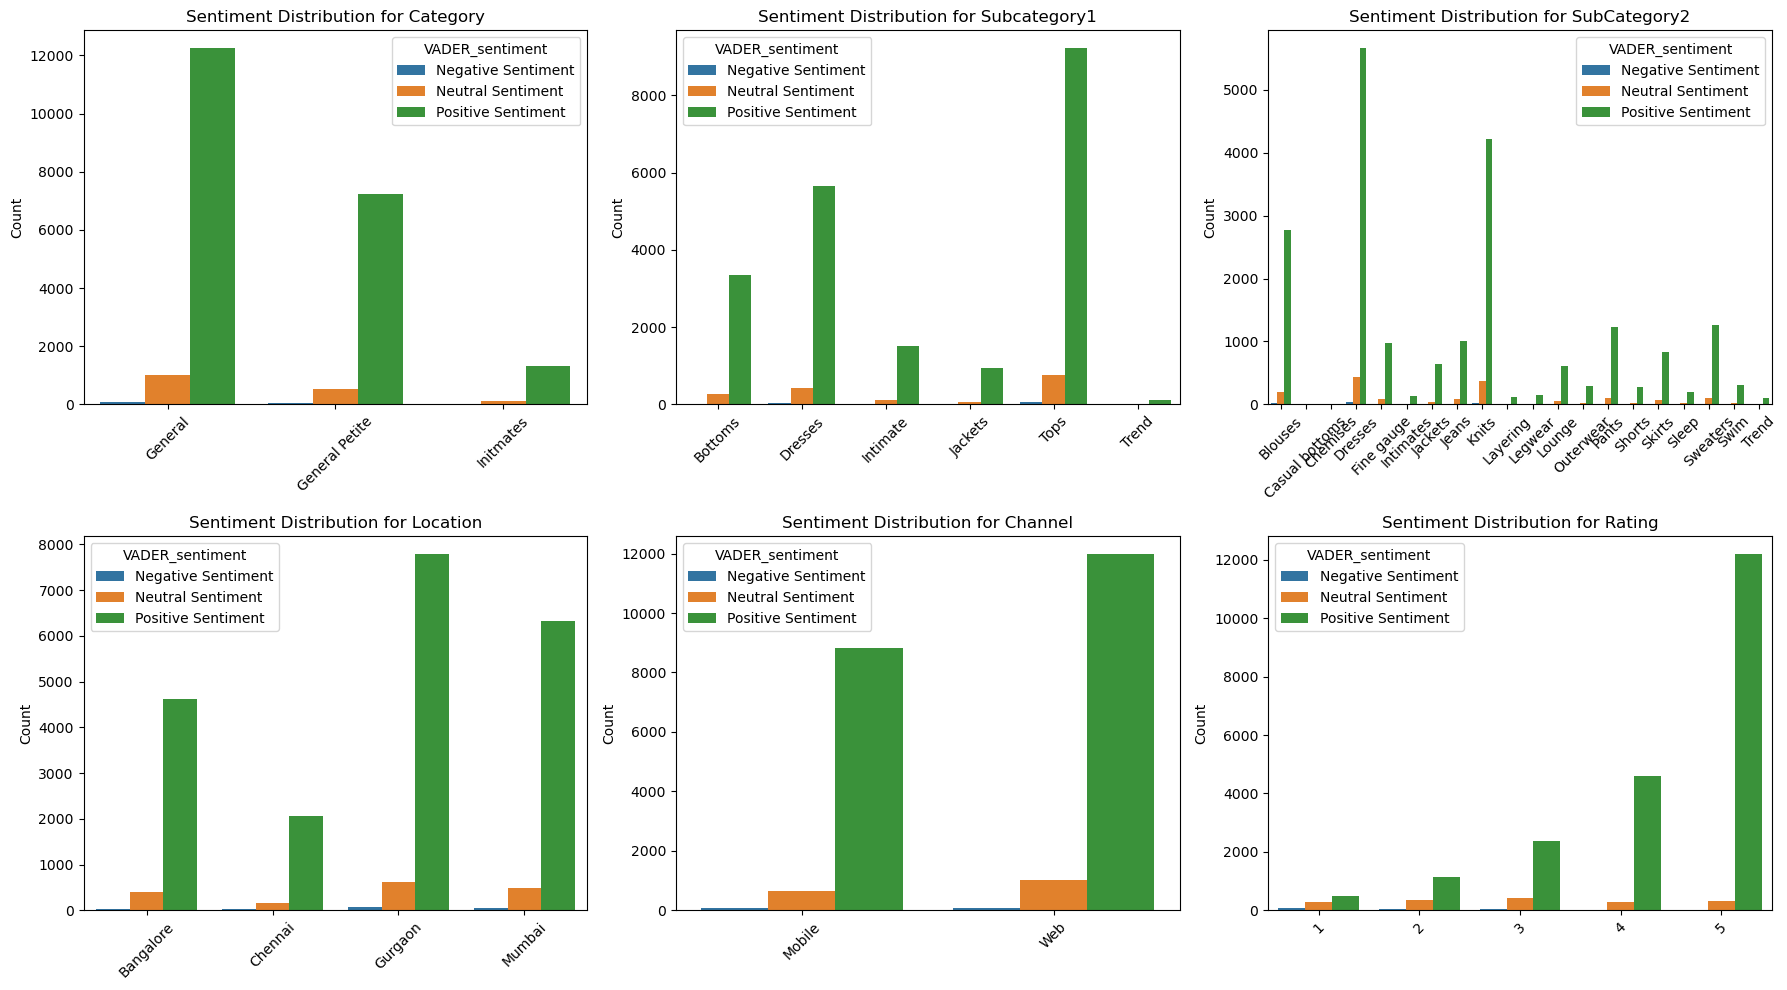

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sentiment_distribution_per_column(df, columns, sentiment_column, ncols=3):
    ncols = min(ncols, len(columns))  # Ensure ncols is not greater than the number of columns
    nrows = (len(columns) + ncols - 1) // ncols  # Calculate the number of rows needed
    
    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 5))
    axes = axes.flatten()  # Flatten the 2D array of axes to iterate easily
    
    for i, col in enumerate(columns):
        # Group by the sentiment column and count occurrences for each column
        sentiment_counts = df.groupby(col)[sentiment_column].value_counts().unstack(fill_value=0)
        sentiment_counts = sentiment_counts.reset_index().melt(id_vars=[col], var_name=sentiment_column, value_name='Count')
        
        # Plot bar plot
        sns.barplot(x=col, y='Count', hue=sentiment_column, data=sentiment_counts, ax=axes[i])
        axes[i].set_title(f'Sentiment Distribution for {col}')
        axes[i].tick_params(axis='x', rotation=45, labelsize=10)
        axes[i].set_xlabel('')
    
    # Hide any unused subplots
    for j in range(len(columns), len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage:
plot_sentiment_distribution_per_column(reviews_characteristics, Categ_for_EDA, 'VADER_sentiment', ncols=3)


d. Perform predictive analytics to understand the drivers of customers who are recommending the products.
e. Create topics and understand themes behind the topics by performing topic mining.

Expected Outputs:
The team expecting below outputs:
a. Detailed Exploratory analysis and create dashboard using these analysis including word clouds, frequency plots, sentiment analysis by channel, location, category, subcategories, age group etc.
b. Performing predictive analysis tasks including topic mining, classification models for predicting which customers are recommending, also predicting rating based on the review.

In [47]:
### Top positive and negative words per category
def get_word_sentiment(word):
    score = analyzer.polarity_scores(word)
    return score['compound']

# Create DataFrames to hold word sentiment scores
word_sentiments = []

for _, row in reviews_informative.iterrows():
    category = row['Category']
    tokens = row['lemmatized']
    for token in tokens:
        sentiment_score = get_word_sentiment(token)
        if sentiment_score != 0:
            word_sentiments.append({'Category': category, 'Word': token, 'VADER_SentimentScore': sentiment_score})

word_sentiments_df = pd.DataFrame(word_sentiments)
word_sentiments_df['VADER_Sentiment'] = np.where(word_sentiments_df['VADER_SentimentScore'] >= 0.5, "Positive Sentiment",
                                        np.where(word_sentiments_df['VADER_SentimentScore'] <= -0.5, "Negative Sentiment",
                                        "Neutral Sentiment"))

word_sentiments_df.head()

,Category,Word,VADER_SentimentScore,VADER_Sentiment
0,Initmates,wonderful,0.5719,Positive Sentiment
1,Initmates,sexy,0.5267,Positive Sentiment
2,Initmates,comfortable,0.5106,Positive Sentiment
3,General,love,0.6369,Positive Sentiment
4,General,pretty,0.4939,Neutral Sentiment


In [48]:
def generate_wordcloud(df, word_col='Word', freq_col='Frequency', title='Word Cloud'):
    # Create a dictionary where the key is the word and the value is the frequency
    word_freq_dict = dict(zip(df[word_col], df[freq_col]))
    
    # Generate the WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)
    
    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')  # Hide axis
    plt.show()

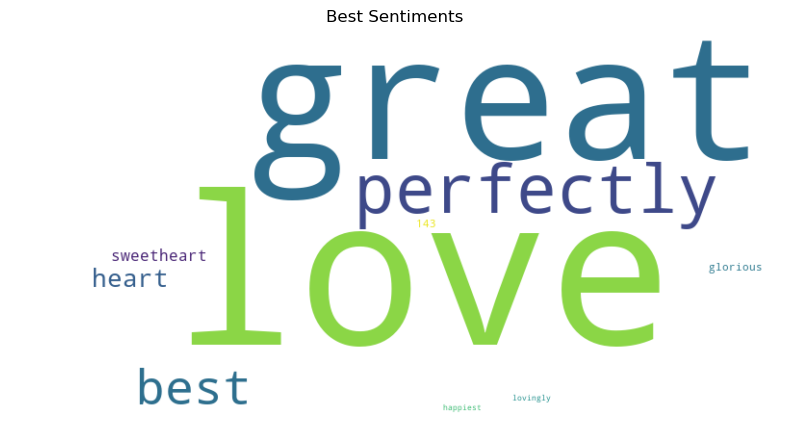

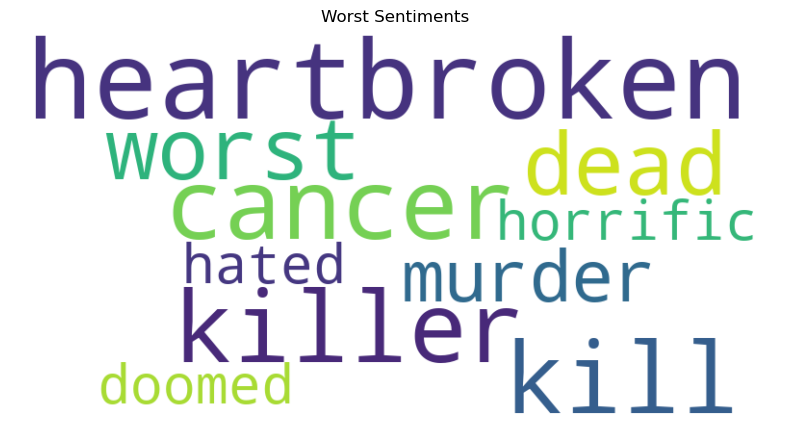

In [49]:
general_words = word_sentiments_df[word_sentiments_df['Category'] == 'General']

grouped = general_words.groupby('Word').agg(
    SentimentScore=('VADER_SentimentScore', 'mean'),  # Average sentiment score for each word
    Frequency=('Word', 'size')  # Count occurrences of each word
).reset_index()
grouped['SentimentScore'] = grouped['SentimentScore'].round(2)
sorted_words = grouped.sort_values(by=['SentimentScore','Frequency'], ascending=False)

# Select the top 100 unique words

top_100_unique_words = sorted_words.head(10)
generate_wordcloud(top_100_unique_words, title="Best Sentiments")

bottom_100_unique_words = sorted_words.tail(10)
generate_wordcloud(bottom_100_unique_words, title="Worst Sentiments")